In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Flatten, Dense, Input, concatenate, Dropout
from tensorflow.keras.layers import Conv2D, MaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical #원 핫 인코딩

from tensorflow.keras.applications import MobileNet
from tensorflow.keras.callbacks import EarlyStopping

import shutil
import os
import cv2
import glob

from datetime import datetime

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

C:\Users\pwngu\AppData\Local\Temp\ipykernel_11984\491508641.py:27: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [13]:
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from konlpy.tag import Okt
from konlpy.corpus import kolaw
import nltk
from wordcloud import WordCloud

In [55]:
#한글 폰트 사용
import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:\\Windows\\Fonts\\malgun.ttf").get_name()  #FontProperties폰트지정함수 위치,이름(맑은고딕)
plt.rc("font", family=font_name) 

#한글 썼을 때 마이너스 깨지는거 해결해주는
import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False

In [3]:
result = pd.read_csv('data/result3.csv')

In [5]:
result

,Category,ID,Post_num,Followers,Contents,Tags,Tags_sum,Tags_count,Tags_rate,Likes,Scaled_likes,Contents_len
0,돈까스,bbo_muksta,-,-,내 꿈은 돈모아서 돈까스의집 사는것 한입에 모든걸 뺏겨버린 맛이다 괜히 40년...,"#돈까스의집, #돈까스맛집, #송파맛집, #삼전역맛집, #빵맛집, #돈까스",6,2,33.33,3126,0.396449,377
1,돈까스,___foodtour,-,-,구름같은 만두를 맛볼 수 있은 곳이에요 너무 맛있어서 음소거 모드로 흡입했어요 ...,"#건대, #성수완당깔끔한, #투어_건대",3,0,0.00,3750,0.475587,467
2,돈까스,mukpresident,-,-,고치돈 좋아하는 국민들 주목 친애하는 국민여러분 먹통령입니다 오늘 저희가 회담을...,"#사장님돈까스, #먹통령_이대, #이대맛집, #이화여대맛집, #고치돈맛집, #돈까스...",8,2,25.00,2761,0.350159,634
3,돈까스,fooseidon_,-,-,다들주목 서울 3대 돈까스 오픈부터 엄청나게 웨이팅이 있는곳벼루다 드뎌...,"#북천, #북천돈까스🔱11:00~19:30, #푸세이돈_용...",18,0,0.00,7885,1.000000,469
4,돈까스,cayeongmi9,-,-,치즈돈까스 집에서만들기 육전용 돈등심으로 미니치즈돈까스를 만들었어요 등심에...,"#치즈돈까스, #집에서만들기, #키마카레, #미니돈까스, #사평카레, #저수분카레,...",19,4,21.05,317,0.040203,393
...,...,...,...,...,...,...,...,...,...,...,...,...
13325,햄버거,na.swrs.on,-,-,행운버거 행운이 있음 좋겠네 맥도날드 햄버거 행운버거 좋반 먹팔 푸드스타그램 ...,"#맥도날드, #햄버거, #행운버거, #좋반, #먹팔, #푸드스타그램, #일상그램, ...",30,7,23.33,95,0.012349,209
13326,햄버거,what.theburger_ph,-,-,What_the_burger_ph 치킨신메뉴판매중 버거랑 치킨이랑 같이 먹으면...,"#포항핫플레이스, #포항죽도동맛집, #포항맛집추천, #포항왓더버거, #포항수제버거,...",14,1,7.14,16,0.002080,255
13327,햄버거,to840815,-,-,몬스터신부101번째프로포즈 영화오랜만에 극장나들이 즐겁고 배부른 하루 상봉...,"#몬스터신부101번째프로포즈, #영화오랜만에, #상봉, #cgv, #팝콘, #햄버거...",7,1,14.29,5,0.000650,63
13328,햄버거,suny6250,-,-,방학을 한 첫찌ㅠ ㅠ 전쟁이 따로없군학교갈때도전쟁이라 생각했는데 방학이 더 전...,"#첫찌방학, #둘찌와함께, #육아는, #헬이네요, #음.., #애셋을, #오늘점심은...",14,1,7.14,13,0.001690,271


In [47]:
result.groupby('Category').mean()['Tags_sum']

Category
돈까스    12.105053
떡볶이    12.523000
스시     15.738000
치킨     14.182000
파스타    12.912385
피자     16.440000
햄버거    11.167126
Name: Tags_sum, dtype: float64

In [7]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13330 entries, 0 to 13329
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Category      13330 non-null  object 
 1   ID            13330 non-null  object 
 2   Post_num      13330 non-null  object 
 3   Followers     13330 non-null  object 
 4   Contents      13330 non-null  object 
 5   Tags          12042 non-null  object 
 6   Tags_sum      13330 non-null  int64  
 7   Tags_count    13330 non-null  int64  
 8   Tags_rate     13330 non-null  float64
 9   Likes         13330 non-null  int64  
 10  Scaled_likes  13330 non-null  float64
 11  Contents_len  13330 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 1.2+ MB


In [8]:
result["Tags"].fillna("", inplace= True)

In [9]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13330 entries, 0 to 13329
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Category      13330 non-null  object 
 1   ID            13330 non-null  object 
 2   Post_num      13330 non-null  object 
 3   Followers     13330 non-null  object 
 4   Contents      13330 non-null  object 
 5   Tags          13330 non-null  object 
 6   Tags_sum      13330 non-null  int64  
 7   Tags_count    13330 non-null  int64  
 8   Tags_rate     13330 non-null  float64
 9   Likes         13330 non-null  int64  
 10  Scaled_likes  13330 non-null  float64
 11  Contents_len  13330 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 1.2+ MB


In [10]:
rc = result[result['Category'] == '치킨']

In [11]:
# 태그 처리 : , 분리
Tag = []
for i in rc["Tags"]:
    ex = i[0:-1].split(", ")
    for j in ex:
        Tag.append(j)
Tag

['#동근이숯불두마리치킨',
 '#동근이숯불두마리치킨',
 '#치킨',
 '#치킨맛집',
 '#배달치킨',
 '#배달맛집',
 '#숯불바베큐',
 '#치킨추천',
 '#복대동맛집',
 '#청주맛집',
 '#청주배달맛',
 '#치킨매니아',
 '#푸드갱_배달',
 '#배달맛집',
 '#치킨맛집',
 '#떡볶이맛집',
 '#배달음식추천',
 '#야식추천',
 '#치맥',
 '#치킨추',
 '',
 '',
 '#대구맛집',
 '#먹방',
 '#instafood',
 '#요리스타그램',
 '#요리',
 '#맛스타그램',
 '#먹스타그램',
 '#선팔',
 '#맞팔',
 '#선팔하면맞팔',
 '#선팔해요',
 '#followforfollow',
 '#맞팔해요',
 '#팔로우',
 '#팔로잉',
 '#팔로미',
 '#팔로워',
 '#데일리',
 '#팔로우미',
 '#소통',
 '#소통해요',
 '#셀피',
 '#카페스타그램',
 '#댓글',
 '#follow4like',
 '#좋아요반사',
 '#좋아요',
 '#like4lik',
 '#치킨맛집',
 '#떡볶이맛집',
 '#치킨추천',
 '#떡볶이추천',
 '#배달맛',
 '#네네치킨',
 '#네네치킨신상',
 '#신상마켓',
 '#쿠캣신상마켓',
 '#국물게티',
 '#로제게티',
 '#매콤게티',
 '#레드마블치킨',
 '#레드마블',
 '#치킨',
 '#치킨추천',
 '#스파게티',
 '#파스타',
 '#홈술',
 '#분식',
 '#야식',
 '#저메추',
 '#쿠캣',
 '#쿠캣마켓',
 '#신상리뷰',
 '#쿠캣매거진',
 '#쿠캣디',
 '#pasta',
 '#spaghetti',
 '#chicke',
 '#굽네치킨제',
 '#우뉴_배달',
 '#배달음식',
 '#배달맛집',
 '#고추바사삭',
 '#볼케이노',
 '#굽네치킨메',
 '#훌랄라치킨',
 '#훌랄라참숯바베큐치킨',
 '#훌랄라치킨',
 '#안산맛집',
 '#인천맛집',
 '#치킨맛집',
 '#숯불치킨',
 '#숯불바베큐',
 '#서산맛집',
 '

In [16]:
tag_count = Counter(Tag)

rank_text = tag_count.most_common()
rank_text

[('#치킨', 1526),
 ('#먹스타그램', 362),
 ('#맛집', 293),
 ('#맛스타그램', 292),
 ('#치킨맛집', 263),
 ('#일상', 225),
 ('', 220),
 ('#먹방', 214),
 ('#좋아요', 205),
 ('#치맥', 187),
 ('#맞팔', 170),
 ('#먹스타', 160),
 ('#술스타그램', 138),
 ('#치', 137),
 ('#치킨추천', 129),
 ('#맥주', 126),
 ('#소통', 124),
 ('#먹팔', 119),
 ('#야식', 117),
 ('#치킨스타그램', 106),
 ('#food', 105),
 ('#데일리', 93),
 ('#일상스타그램', 93),
 ('#chicken', 92),
 ('#주말', 92),
 ('#좋아요반사', 90),
 ('#불금', 90),
 ('#daily', 83),
 ('#치킨먹방', 81),
 ('#데이트', 81),
 ('#누구나홀딱반한닭', 81),
 ('#신년회모임', 77),
 ('#쌈닭', 77),
 ('#광', 77),
 ('#술', 76),
 ('#팔로우', 74),
 ('#부산', 73),
 ('#피자', 73),
 ('#소주', 72),
 ('#선팔', 71),
 ('#먹스타맞팔', 70),
 ('#좋반', 69),
 ('#집밥', 68),
 ('#음식', 68),
 ('#통닭', 67),
 ('#맛집추천', 65),
 ('#치느님', 65),
 ('#저녁', 64),
 ('#선팔하면맞팔', 63),
 ('#삼겹살', 63),
 ('#떡볶이', 62),
 ('#후라이드', 62),
 ('#치킨먹는날', 62),
 ('#치킨맥주', 60),
 ('#맛있다', 59),
 ('#배달맛집', 58),
 ('#치킨그램', 56),
 ('#f4f', 55),
 ('#럽스타그램', 55),
 ('#양념치킨', 54),
 ('#먹방스타그램', 54),
 ('#jmt', 53),
 ('#맛집스타그램', 52),
 ('#교촌치킨', 52

In [18]:
ch_tag = pd.DataFrame(rank_text)

In [19]:
ch_tag.columns=['tags', 'count']

In [21]:
ch_tag1 = ch_tag.copy() #ch_tag1로 작업

In [23]:
# 태그 빈도수 50개 이상만
ch_tag1 = ch_tag1[ch_tag1['count'] > 50]

In [26]:
ch_tag1.head(50)

,tags,count
0,#치킨,1526
1,#먹스타그램,362
2,#맛집,293
3,#맛스타그램,292
4,#치킨맛집,263
5,#일상,225
6,,220
7,#먹방,214
8,#좋아요,205
9,#치맥,187


In [78]:
ch_tag1

,tags,count
1,#먹스타그램,362
2,#맛집,293
3,#맛스타그램,292
4,#치킨맛집,263
5,#일상,225
...,...,...
63,#교촌치킨,52
64,#야식치킨,52
65,#맥주전문점,52
66,#치킨한마리,52


In [75]:
l = []
for i in ch_tag1['tags']:
    l.append(len(i))
print(l)

# ch_tag1['tags'].loc[i]

[6, 3, 6, 5, 3, 0, 3, 4, 3, 3, 4, 6, 2, 5, 3, 3, 3, 3, 7, 5, 4, 7, 8, 3, 6, 3, 6, 5, 4, 9, 6, 3, 2, 2, 4, 3, 3, 3, 3, 6, 3, 3, 3, 3, 5, 4, 3, 7, 4, 4, 5, 6, 5, 4, 5, 5, 4, 6, 5, 7, 4, 7, 5, 5, 6, 6, 3]


In [79]:
ch_tag1['tags_len'] = l

In [59]:
ch_tag1 = ch_tag1.drop([0]) #치킨 삭제

In [86]:
ch_tag1 = ch_tag1.drop([6]) #빈칸 삭제

In [87]:
ch_tag1[ch_tag1['tags_len']==2]

,tags,count,tags_len
13,#치,137,2
33,#광,77,2
34,#술,76,2


## 에센셜 태그 추천

In [111]:
result

,Category,ID,Post_num,Followers,Contents,Tags,Tags_sum,Tags_count,Tags_rate,Likes,Scaled_likes,Contents_len
0,돈까스,bbo_muksta,-,-,내 꿈은 돈모아서 돈까스의집 사는것 한입에 모든걸 뺏겨버린 맛이다 괜히 40년...,"#돈까스의집, #돈까스맛집, #송파맛집, #삼전역맛집, #빵맛집, #돈까스",6,2,33.33,3126,0.396449,377
1,돈까스,___foodtour,-,-,구름같은 만두를 맛볼 수 있은 곳이에요 너무 맛있어서 음소거 모드로 흡입했어요 ...,"#건대, #성수완당깔끔한, #투어_건대",3,0,0.00,3750,0.475587,467
2,돈까스,mukpresident,-,-,고치돈 좋아하는 국민들 주목 친애하는 국민여러분 먹통령입니다 오늘 저희가 회담을...,"#사장님돈까스, #먹통령_이대, #이대맛집, #이화여대맛집, #고치돈맛집, #돈까스...",8,2,25.00,2761,0.350159,634
3,돈까스,fooseidon_,-,-,다들주목 서울 3대 돈까스 오픈부터 엄청나게 웨이팅이 있는곳벼루다 드뎌...,"#북천, #북천돈까스🔱11:00~19:30, #푸세이돈_용...",18,0,0.00,7885,1.000000,469
4,돈까스,cayeongmi9,-,-,치즈돈까스 집에서만들기 육전용 돈등심으로 미니치즈돈까스를 만들었어요 등심에...,"#치즈돈까스, #집에서만들기, #키마카레, #미니돈까스, #사평카레, #저수분카레,...",19,4,21.05,317,0.040203,393
...,...,...,...,...,...,...,...,...,...,...,...,...
13325,햄버거,na.swrs.on,-,-,행운버거 행운이 있음 좋겠네 맥도날드 햄버거 행운버거 좋반 먹팔 푸드스타그램 ...,"#맥도날드, #햄버거, #행운버거, #좋반, #먹팔, #푸드스타그램, #일상그램, ...",30,7,23.33,95,0.012349,209
13326,햄버거,what.theburger_ph,-,-,What_the_burger_ph 치킨신메뉴판매중 버거랑 치킨이랑 같이 먹으면...,"#포항핫플레이스, #포항죽도동맛집, #포항맛집추천, #포항왓더버거, #포항수제버거,...",14,1,7.14,16,0.002080,255
13327,햄버거,to840815,-,-,몬스터신부101번째프로포즈 영화오랜만에 극장나들이 즐겁고 배부른 하루 상봉...,"#몬스터신부101번째프로포즈, #영화오랜만에, #상봉, #cgv, #팝콘, #햄버거...",7,1,14.29,5,0.000650,63
13328,햄버거,suny6250,-,-,방학을 한 첫찌ㅠ ㅠ 전쟁이 따로없군학교갈때도전쟁이라 생각했는데 방학이 더 전...,"#첫찌방학, #둘찌와함께, #육아는, #헬이네요, #음.., #애셋을, #오늘점심은...",14,1,7.14,13,0.001690,271


In [128]:
Tag_all = []
for i in result["Tags"]:
    ex = i[0:-1].split(", ")
    for j in ex:
        Tag_all.append(j)
len(Tag_all)

183315

In [129]:
tag_count_all = Counter(Tag_all)

rank_text_all = tag_count_all.most_common()
rank_text_all

[('#피자', 2051),
 ('#치킨', 1687),
 ('#떡볶이', 1602),
 ('#먹스타그램', 1598),
 ('#스시', 1541),
 ('', 1508),
 ('#돈까스', 1459),
 ('#햄버거', 1262),
 ('#맛집', 1260),
 ('#파스타', 1241),
 ('#일상', 1209),
 ('#맛스타그램', 1133),
 ('#초밥', 858),
 ('#소통', 682),
 ('#먹방', 676),
 ('#맞팔', 663),
 ('#좋아요', 614),
 ('#먹스타', 526),
 ('#먹팔', 493),
 ('#혜화역맛집', 483),
 ('#좋아요반사', 460),
 ('#집밥', 459),
 ('#food', 459),
 ('#일상스타그램', 458),
 ('#데일리', 428),
 ('#좋반', 406),
 ('#서울맛집', 370),
 ('#초밥맛집', 360),
 ('#맛집추천', 353),
 ('#수제버거', 340),
 ('#점심', 333),
 ('#음식', 333),
 ('#맛집스타그램', 324),
 ('#foodstagram', 321),
 ('#스테이크', 320),
 ('#선팔하면맞팔', 303),
 ('#instafood', 298),
 ('#선팔', 295),
 ('#샐러드', 293),
 ('#일상그램', 292),
 ('#파스타맛집', 292),
 ('#일식', 285),
 ('#오늘뭐먹지', 285),
 ('#치킨맛집', 284),
 ('#야식', 282),
 ('#사시미', 277),
 ('#댓글소통', 277),
 ('#daily', 266),
 ('#맞팔은댓', 253),
 ('#일상생활', 253),
 ('#돈까스맛집', 250),
 ('#술스타그램', 247),
 ('#대학로맛집', 247),
 ('#오마카세', 247),
 ('#먹스타맞팔', 244),
 ('#저녁', 244),
 ('#sushi', 241),
 ('#대학로카페', 241),
 ('#대학로초밥', 240),
 ('

In [130]:
rtag = pd.DataFrame(rank_text_all)

In [131]:
rtag.columns=['tags', 'count']

In [132]:
rtag

,tags,count
0,#피자,2051
1,#치킨,1687
2,#떡볶이,1602
3,#먹스타그램,1598
4,#스시,1541
...,...,...
42052,#애셋을,1
42053,#다풀어야,1
42054,#먹을수있는,1
42055,#두뇌풀가동중,1


In [133]:
# 음식 이름 들어가는 것 삭제

if1 = rtag[rtag['tags'].str.contains("치킨|떡볶이|스시|파스타|피자|햄버거|돈까스|chicken|sushi|pasta|pizza|hamburger|burger|tteokbokki")].index
rtag.drop(if1, inplace=True)
rtag

,tags,count
3,#먹스타그램,1598
5,,1508
8,#맛집,1260
10,#일상,1209
11,#맛스타그램,1133
...,...,...
42052,#애셋을,1
42053,#다풀어야,1
42054,#먹을수있는,1
42055,#두뇌풀가동중,1


In [153]:
rtag.drop(5, inplace=True)

In [160]:
rtag = rtag.head(30)

In [ ]:
#초밥, 혜화역, 대학로, 서울맛집, 일상그램은 스시 특화 해시태그

In [152]:
rtag.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38284 entries, 3 to 42056
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tags    38284 non-null  object
 1   count   38284 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 897.3+ KB


In [164]:
len(rtag)

25

In [163]:
rtag.drop([12, 19, 26, 27, 29], inplace=True)

C:\Users\pwngu\AppData\Local\Temp\ipykernel_11984\4088191363.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rtag.drop([12, 19, 26, 27, 29], inplace=True)


In [192]:
rtag

,tags,count
3,#먹스타그램,1598
8,#맛집,1260
10,#일상,1209
11,#맛스타그램,1133
13,#소통,682
14,#먹방,676
15,#맞팔,663
16,#좋아요,614
17,#먹스타,526
18,#먹팔,493


In [170]:
f_rtag = rtag.head(10)

In [226]:
colors = sns.color_palette('CMRmap',len(f_rtag))

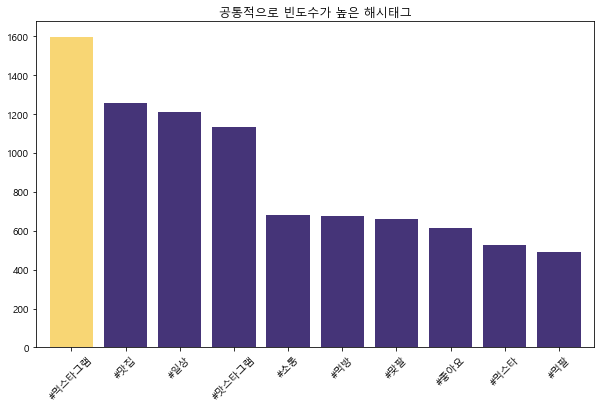

In [572]:
f_rtag.plot.bar(x='tags', y='count', color=['#f8d674', '#453478', '#453478', '#453478', '#453478', '#453478', '#453478', '#453478', '#453478', '#453478'], 
                rot=45, figsize=(10,6), width=0.8)
plt.xlabel('')
plt.title('공통적으로 빈도수가 높은 해시태그')
plt.legend().set_visible(False)

In [178]:
f_rtag['tags'].tolist()

['#먹스타그램', '#맛집', '#일상', '#맛스타그램', '#소통', '#먹방', '#맞팔', '#좋아요', '#먹스타', '#먹팔']

In [ ]:
#스시 특화 해시태그가 많이 포함됨

In [147]:
result[result['Tags'].str.contains('혜화역')]['Category'].value_counts()

스시     240
돈까스      2
햄버거      2
Name: Category, dtype: int64

In [149]:
rs = result[result['Category']=='스시']

In [150]:
Tag = []
for i in rs["Tags"]:
    ex = i[0:-1].split(", ")
    for j in ex:
        Tag.append(j)
Tag

['#寿司',
 '#鮨',
 '#sushi',
 '#すし',
 '#초밥',
 '#스시',
 '#北の華はやし',
 '#千歳',
 '#千歳グルメ',
 '#千歳カフェ',
 '#新千歳空港',
 '#新千歳空港グルメ',
 '#新千歳',
 '#新千歳空港限定',
 '#札幌グルメ',
 '#札幌観光',
 '#北海道グルメ',
 '#hokkaido',
 '#hokkaidotrip',
 '#sapporo',
 '#寿司スタグラム',
 '#予約困難店',
 '#ミシュラン',
 '#ミシュラン北海道',
 '#インスタグルメアワード2023',
 '#北海道じゃらん',
 '#poroco',
 '#寿司の虎',
 '#虎の日',
 '#新宿焼肉ブルズ',
 '#焼肉ブルズ',
 '#新宿焼肉',
 '#焼肉',
 '#肉寿司',
 '#肉寿司食べ放題',
 '#東京焼肉',
 '#焼肉食べ放題',
 '#東京肉寿司',
 '#雛鮨',
 '#寿司',
 '#寿司食べ放題',
 '#銀座グルメ',
 '#銀座ランチ',
 '#新宿グルメ',
 '#炉端焼き',
 '#おでん食べ放題',
 '#東京おでん',
 '#新宿おでん',
 '#東京食べ放題',
 '#食べ放題',
 '#東京グルメ',
 '#恋文横丁',
 '#渋谷グルメ',
 '#渋谷ランチ',
 '#渋谷居酒屋',
 '#新宿ランチ',
 '#75chacha',
 '#新大久保グルメ',
 '#스',
 '#미자씨',
 '#먹통령_홍대',
 '#홍대맛집',
 '#홍대횟집',
 '#연남동술집',
 '#해물찜',
 '#해물탕',
 '#스시맛',
 '#협찬',
 '#제주미묘✨메뉴',
 '#미묘',
 '#제주이자카야',
 '#제주사시미맛집',
 '#제주일식',
 '#제주술집',
 '#제주다이닝',
 '#제주스시',
 '#이도동맛집',
 '#제주초밥',
 '#신제주맛집',
 '#제주공항근처맛집',
 '#제주시맛집',
 '#제주도민맛집',
 '#제주도맛집',
 '#제주맛집탐방',
 '#제주핫플',
 '#제주도여행',
 '#제주가볼만한곳',
 '#제주핫플레이스',
 '#일식',
 '#이자카야',
 '#

In [151]:
tag_count = Counter(Tag)

rank_text = tag_count.most_common()
rank_text

[('#스시', 1526),
 ('#초밥', 805),
 ('#혜화역맛집', 480),
 ('#초밥맛집', 358),
 ('#사시미', 271),
 ('#서울맛집', 264),
 ('#일식', 250),
 ('#일상그램', 243),
 ('#대학로초밥', 240),
 ('#대학로스시마시따', 240),
 ('#대학로데이트', 240),
 ('#대학로연극', 240),
 ('#대학로스시', 240),
 ('#대학로맛집', 240),
 ('#대학로카페', 240),
 ('#혜화역스시', 240),
 ('#혜화역초밥', 240),
 ('#혜화역연극', 240),
 ('#혜화역데이트', 240),
 ('#사주잘보는곳', 240),
 ('#타로점', 240),
 ('#사주운세', 240),
 ('#사주카페', 240),
 ('#사주상담', 240),
 ('#서울대학교병원', 240),
 ('#대학로스시마시', 240),
 ('#sushi', 239),
 ('#오마카세', 239),
 ('#회전초밥', 217),
 ('', 213),
 ('#맛집', 199),
 ('#회스타그램', 187),
 ('#매운탕', 186),
 ('#초밥뷔페', 186),
 ('#도마29', 185),
 ('#석화', 185),
 ('#마늘족발', 184),
 ('#양념족발', 184),
 ('#먹스타그램', 175),
 ('#寿司', 174),
 ('#맛스타그램', 159),
 ('#잡채밥', 159),
 ('#고추잡채', 159),
 ('#짬짜면', 159),
 ('#사천탕수육', 159),
 ('#피자스타그램', 159),
 ('#치즈피자', 159),
 ('#포테이토피자', 159),
 ('#시카고피자', 159),
 ('#하프앤하프', 159),
 ('#쉬림프골드', 159),
 ('#화덕피자', 159),
 ('#피자빵', 158),
 ('#삼겹살데이', 155),
 ('#부업쩡', 155),
 ('#스시오마카세', 129),
 ('#스시맛집', 115),
 ('#鮨', 87),
 

## 사진-해시태그 추천 연동

In [ ]:
pd.set_option('display.max_colwidth', None)  #col내용 생략안하고 모두 보여주는 옵션

In [399]:
#sug = pd.read_csv('data/suggestion2.csv')
#sug

,Category,Plus_Tags,Essential_Tags
0,돈까스,"['#돈까스', '#돈까스맛집', '#돈카츠', '#집밥', '#점심', '#치즈돈까스', '#돈가스', '#food', '#우동', '#떡볶이']","['#먹스타그램', '#맛집', '#일상', '#맛스타그램', '#소통', '#먹방', '#맞팔', '#좋아요', '#먹스타', '#먹팔']"
1,떡볶이,"['#떡볶이', '#떡볶이맛집', '#분식', '#순대', '#집밥', '#koreanfood', '#튀김', '#김밥', '#야식', '#mukbangasmr']","['#먹스타그램', '#맛집', '#일상', '#맛스타그램', '#소통', '#먹방', '#맞팔', '#좋아요', '#먹스타', '#먹팔']"
2,스시,"['#스시', '#초밥', '#혜화역맛집', '#초밥맛집', '#사시미', '#서울맛집', '#일식', '#일상그램', '#대학로초밥', '#대학로스시마시따']","['#먹스타그램', '#맛집', '#일상', '#맛스타그램', '#소통', '#먹방', '#맞팔', '#좋아요', '#먹스타', '#먹팔']"
3,치킨,"['#치킨', '#치킨맛집', '#술스타그램', '#치킨추천', '#맥주', '#야식', '#치킨스타그램', '#food', '#데일리', '#일상스타그램']","['#먹스타그램', '#맛집', '#일상', '#맛스타그램', '#소통', '#먹방', '#맞팔', '#좋아요', '#먹스타', '#먹팔']"
4,파스타,"['#파스타', '#파스타맛집', '#스테이크', '#피자', '#샐러드', '#pasta', '#생면파스타', '#홍대맛집', '#연남동맛집', '#연남맛집']","['#먹스타그램', '#맛집', '#일상', '#맛스타그램', '#소통', '#먹방', '#맞팔', '#좋아요', '#먹스타', '#먹팔']"
5,피자,"['#피자', '#댓글소통', '#일상생활', '#맞팔은댓', '#맞팔좋아요', '#인스타일상', '#일상스타그램', '#선팔은맞팔', '#밥상일기', '#같이먹자']","['#먹스타그램', '#맛집', '#일상', '#맛스타그램', '#소통', '#먹방', '#맞팔', '#좋아요', '#먹스타', '#먹팔']"
6,햄버거,"['#햄버거', '#수제버거', '#수제버거맛집', '#버거맛집', '#햄버거맛집', '#hamburger', '#버거', '#burger', '#잠실맛집', '#수제버거전문점']","['#먹스타그램', '#맛집', '#일상', '#맛스타그램', '#소통', '#먹방', '#맞팔', '#좋아요', '#먹스타', '#먹팔']"


In [592]:
sug = pd.read_csv('data/suggestion3.csv')
sug

,Category,Plus_Tags,Essential_Tags
0,돈까스,"['#돈까스', '#돈까스맛집', '#집밥', '#점심', '#치즈돈까스', '#food', '#우동', '#떡볶이', '#데일리', '#foodstagram']","['#먹스타그램', '#맛집', '#일상', '#맛스타그램', '#소통', '#먹방', '#맞팔', '#좋아요', '#먹스타', '#먹팔']"
1,떡볶이,"['#떡볶이', '#떡볶이맛집', '#분식', '#순대', '#집밥', '#koreanfood', '#튀김', '#김밥', '#야식', '#mukbangasmr']","['#먹스타그램', '#맛집', '#일상', '#맛스타그램', '#소통', '#먹방', '#맞팔', '#좋아요', '#먹스타', '#먹팔']"
2,스시,"['#스시', '#초밥', '#초밥맛집', '#사시미', '#서울맛집', '#일식', '#sushi', '#오마카세', '#회전초밥', '#초밥뷔페']","['#먹스타그램', '#맛집', '#일상', '#맛스타그램', '#소통', '#먹방', '#맞팔', '#좋아요', '#먹스타', '#먹팔']"
3,치킨,"['#치킨', '#치킨맛집', '#술스타그램', '#치킨추천', '#맥주', '#야식', '#치킨스타그램', '#food', '#데일리', '#일상스타그램']","['#먹스타그램', '#맛집', '#일상', '#맛스타그램', '#소통', '#먹방', '#맞팔', '#좋아요', '#먹스타', '#먹팔']"
4,파스타,"['#파스타', '#파스타맛집', '#스테이크', '#피자', '#샐러드', '#pasta', '#생면파스타', '#홍대맛집', '#연남동맛집', '#연남맛집']","['#먹스타그램', '#맛집', '#일상', '#맛스타그램', '#소통', '#먹방', '#맞팔', '#좋아요', '#먹스타', '#먹팔']"
5,피자,"['#피자', '#밥상일기', '#같이먹자', '#어린이집졸업', '#파스타', '#유치원입학', '#휴식시간', '#instafood', '#데일리', '#스파게티']","['#먹스타그램', '#맛집', '#일상', '#맛스타그램', '#소통', '#먹방', '#맞팔', '#좋아요', '#먹스타', '#먹팔']"
6,햄버거,"['#햄버거', '#수제버거', '#단체주문', '#잠실수제버거', '#단체도시락주문', '#감자튀김', '#food', '#맥도날드', '#점심', '#버거킹']","['#먹스타그램', '#맛집', '#일상', '#맛스타그램', '#소통', '#먹방', '#맞팔', '#좋아요', '#먹스타', '#먹팔']"


In [233]:
model = load_model('model/finalfood_hidden3.h5')

In [582]:
def predict(img):
    img = cv2.imread(img, cv2.IMREAD_COLOR)
    img = cv2.resize(img, dsize=(128, 128))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img / 255.0
    
    plt.imshow(img)
    plt.axis('off')
    
    pred = model.predict(img.reshape(-1, 128, 128, 3))

    class_name = ['햄버거', '치킨', '파스타', '피자', '돈까스', '떡볶이', '스시']
    class_index = np.argmax(pred)
    print("\n","︶⊹︶︶୨୧︶︶⊹︶︶୨୧︶︶⊹︶︶୨୧︶︶⊹︶︶୨୧︶︶⊹︶")
    
    print("이 사진은 {0:0.2f}% 확률로".format(100*pred.max()), class_name[class_index], "으로 분류됩니다.")
    print("-----------------------------------------")
    
    for i in sug['Category']:
        if i==class_name[class_index]:
            result = sug[sug['Category']==i]
            ess_tag = result['Essential_Tags']
            plus_tag = result['Plus_Tags']
    print('\n','음식별 유입을 높이기 위한 해시태그 ','\n','|￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣|', '\n',
          ' ', plus_tag.values[0][1:-1], '\n','|＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿|','\n', 
          '                                                  \ (•◡•) /', '\n', '                                                   \      /', '\n')
    print('\n','팔로워 수를 높이기 위한 해시태그 ','\n','|￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣|', '\n',
          ' ', ess_tag.values[0][1:-1], '\n','|＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿|','\n', 
          '                                                  \ (•◡•) /', '\n', '                                                   \      /', '\n')

In [590]:
img='data/pizza.jpg'

1/1 [==============================] - 0s 27ms/step

 ︶⊹︶︶୨୧︶︶⊹︶︶୨୧︶︶⊹︶︶୨୧︶︶⊹︶︶୨୧︶︶⊹︶
이 사진은 96.98% 확률로 피자 으로 분류됩니다.
-----------------------------------------

 음식별 유입을 높이기 위한 해시태그  
 |￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣| 
   '#피자', '#밥상일기', '#같이먹자', '#어린이집졸업', '#파스타', '#유치원입학', '#휴식시간', '#instafood', '#데일리', '#스파게티' 
 |＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿| 
                                                   \ (•◡•) / 
                                                    \      / 


 팔로워 수를 높이기 위한 해시태그  
 |￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣￣| 
   '#먹스타그램', '#맛집', '#일상', '#맛스타그램', '#소통', '#먹방', '#맞팔', '#좋아요', '#먹스타', '#먹팔' 
 |＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿＿| 
                                                   \ (•◡•) / 
                                                    \      / 



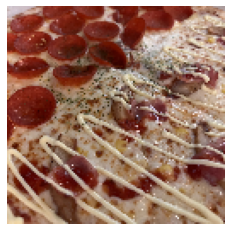

In [593]:
predict(img)

- 시행착오^^

In [492]:
print('음식별 유입을 높이기 위한 해시태그로는 ',plus_tag.values[0][1:-1], '을/를,', '\n', '팔로워 수를 높이기 위한 해시태그로는 ', ess_tag.values[0][1:-1], '을/를 추천합니다.')

음식별 유입을 높이기 위한 해시태그로는  '#치킨', '#치킨맛집', '#술스타그램', '#치킨추천', '#맥주', '#야식', '#치킨스타그램', '#food', '#데일리', '#일상스타그램' 을/를, 
 팔로워 수를 높이기 위한 해시태그로는  '#먹스타그램', '#맛집', '#일상', '#맛스타그램', '#소통', '#먹방', '#맞팔', '#좋아요', '#먹스타', '#먹팔' 을/를 추천합니다.


In [397]:
for i in sug['Category']:
    if i==class_name[class_index]:
        index = sug[sug['Category']==i].index
        ess_tag = sug['Essential_Tags'][index]
        plus_tag = sug['Plus_Tags'][index]
print(ess_tag.values[0])

['#먹스타그램', '#맛집', '#일상', '#맛스타그램', '#소통', '#먹방', '#맞팔', '#좋아요', '#먹스타', '#먹팔']


In [415]:
for i in sug['Category']:
    if i==class_name[class_index]:
        result = sug[sug['Category']==i]
        ess_tag = result['Essential_Tags']
        plus_tag = result['Plus_Tags']
print('음식별 유입을 높이기 위한 해시태그로는 ', plus_tag.values[0][1:-1], '을,', '\n', '팔로워 수를 높이기 위한 해시태그로는 ', ess_tag.values[0][1:-1], '를 추천합니다.')

음식별 유입을 높이기 위한 해시태그로는  '#치킨', '#치킨맛집', '#술스타그램', '#치킨추천', '#맥주', '#야식', '#치킨스타그램', '#food', '#데일리', '#일상스타그램' 을, 
 팔로워 수를 높이기 위한 해시태그로는  '#먹스타그램', '#맛집', '#일상', '#맛스타그램', '#소통', '#먹방', '#맞팔', '#좋아요', '#먹스타', '#먹팔' 를 추천합니다.
